In [1]:
import os
os.getcwd()

'/Users/yunie/Documents/USC/2019_Fall/INF_552_machine_learning/INF552_hw1'

In [2]:
import sys
sys.path.append(sys.version)
import pip
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt

In [3]:
data, meta = arff.loadarff('column_2C_weka.arff')
meta

Dataset: column_2C_weka
	pelvic_incidence's type is numeric
	pelvic_tilt's type is numeric
	lumbar_lordosis_angle's type is numeric
	sacral_slope's type is numeric
	pelvic_radius's type is numeric
	degree_spondylolisthesis's type is numeric
	class's type is nominal, range is ('Abnormal', 'Normal')

In [4]:
dataframe = pd.DataFrame(data)

In [5]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [6]:
def make_train_data (data, num_class0, num_class1):
    train_data_class0 = data[data["class"] == 0][0 : num_class0]
    train_data_class1 = data[data["class"] == 1][0 : num_class1]
    train_data_set = pd.concat([train_data_class0, train_data_class1])
    return train_data_set


In [7]:
def make_test_data (data, num_class0_train_data, num_class1_train_data):
    test_data_class0 = data[data["class"] == 0][num_class0_train_data : ]
    test_data_class1 = data[data["class"] == 1][num_class1_train_data : ]
    test_data = pd.concat([test_data_class0, test_data_class1])
    return test_data


In [8]:
def get_param (data, col_name):
    data_param = data[data.columns.difference([col_name])]
    return data_param

In [9]:
def get_label (data, col_name):
    data_label = data[col_name]
    return data_label

In [10]:
def get_optimal_k(error, which_error) :
    optimal_k_value = error['k_value'][(error[which_error].values.argmin())]
    return int(optimal_k_value)

In [11]:
def make_error_dataframe():
    dataframe = pd.DataFrame(columns = ['k_value', 'train_error_rate', 'test_error_rate'])
    return dataframe

In [12]:
def get_best_error(error, which_error):
    best_error = error[which_error].values.min()
    return best_error

<Figure size 3600x3600 with 0 Axes>

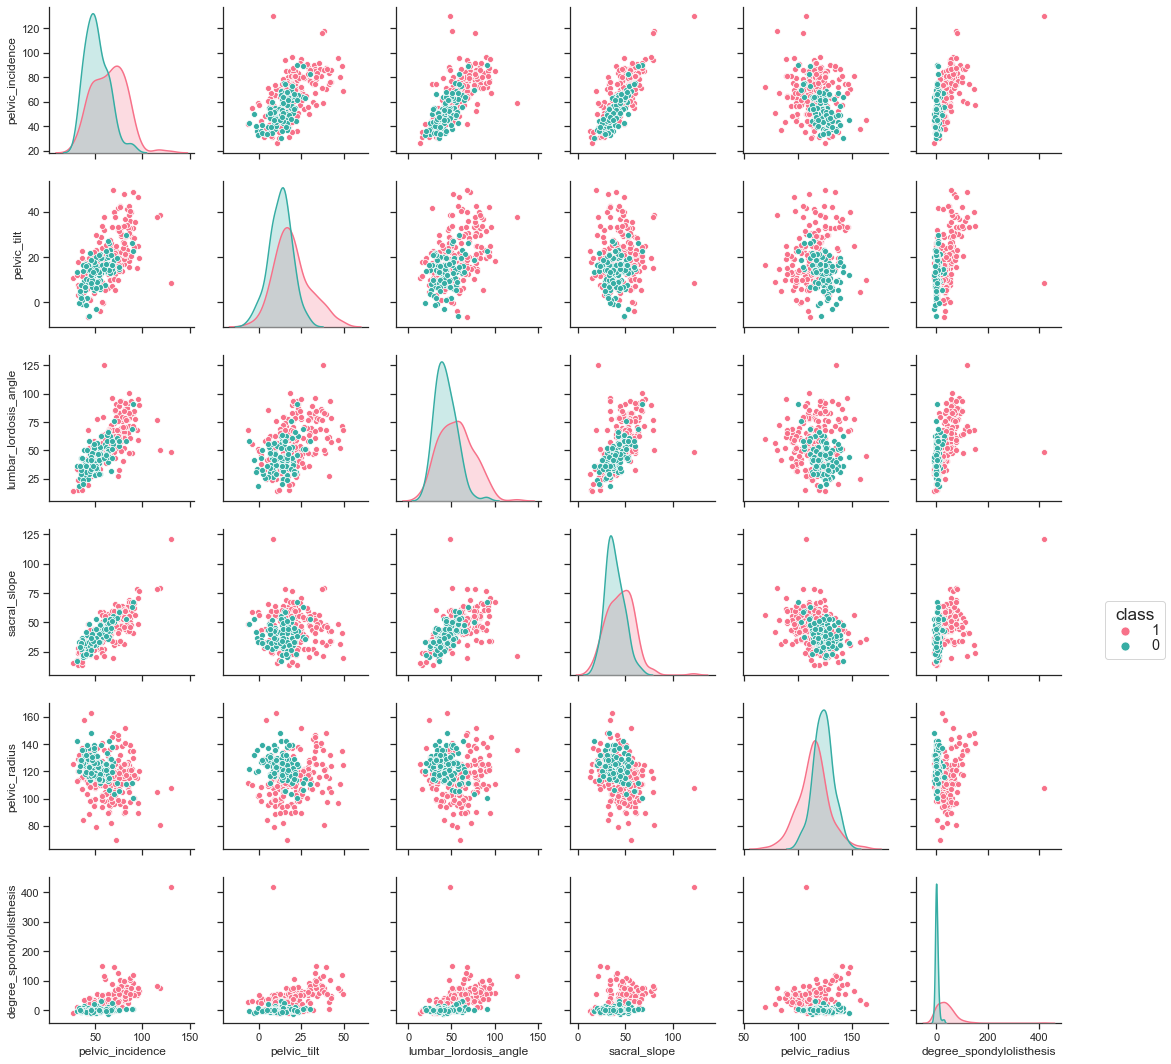

In [13]:
#b(i)
import seaborn as sns
import matplotlib.pylab as plt

plt.figure(figsize = (50,50))
sns.set(style = "ticks", color_codes = True)
scatterplot = sns.pairplot(dataframe, hue = "class", palette = "husl")
scatterplot._legend.remove()
plt.legend(title = "class", labels = ('1', '0'), 
           labelspacing = .1, markerscale = 1.5,
           loc = 'center left', bbox_to_anchor = (1.25, 1.5),
           title_fontsize = 'x-large', fontsize = 'large')
plt.savefig('scatterplot.png')

In [13]:
dataframe["class"] = dataframe["class"].replace({b'Abnormal' : 1})
dataframe["class"] = dataframe["class"].replace({b'Normal' : 0})

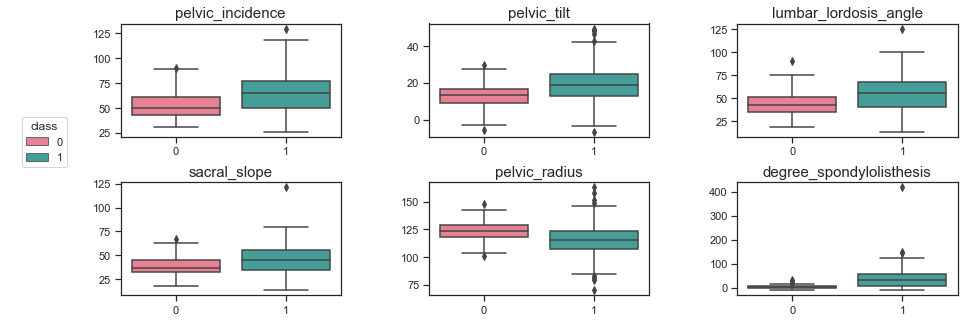

In [15]:
#(b)ii
fig = plt.figure(figsize = (15,5))
fig.subplots_adjust(hspace = .4, wspace = .4)
for i in range(1 , len(dataframe.columns)):
    ax = fig.add_subplot(2,3,i)
    boxplot = sns.boxplot(data = dataframe, x = "class", y = dataframe.columns[(i - 1)], 
                          hue = "class", palette = "husl", dodge = False)
    plt.xlabel('')
    plt.ylabel('')
    boxplot.legend_.remove()
    plt.title(dataframe.columns[(i - 1)], fontsize = 15)
handles, labels = ax.get_legend_handles_labels()
fig.legend(title = "class", handles = handles, labels = labels,
           bbox_to_anchor = [.015, .5], loc = 'center left')
fig.savefig('boxplot.png')

In [14]:
#(b)iii
num_class0_data = 70
num_class1_data = 140

train_data = make_train_data(dataframe, num_class0_data, num_class1_data)
test_data = make_test_data(dataframe, num_class0_data, num_class1_data)

In [82]:
#(c)i
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def get_knn_error(train_data, test_data, max_k, increase_by, metric, metric_param = None, weights = 'uniform', p = None):
    
    error = make_error_dataframe()
    train_data_param = get_param(train_data, "class")
    train_data_label = get_label(train_data, "class")
    
    test_data_param = get_param(test_data, "class")
    test_data_label = get_label(test_data, "class")
    
    for i in range (1, (max_k + 1), increase_by):
        knn_classifier = KNeighborsClassifier(n_neighbors = i, metric = metric, metric_params = metric_param, p = p)
        knn_classifier.fit(train_data_param, train_data_label)
        
        knn_train_predict = knn_classifier.predict(train_data_param)
        knn_train_error_rate = float(1 - accuracy_score(knn_train_predict, train_data_label))
    
        knn_test_predict = knn_classifier.predict(test_data_param)
        knn_test_error_rate = float(1 - accuracy_score(knn_test_predict, test_data_label))
    
        error = error.append({'k_value' : i, 
                          'train_error_rate' : float(knn_train_error_rate),
                          'test_error_rate' : float(knn_test_error_rate)},
                         ignore_index = True)
    return error

error = get_knn_error(train_data, test_data, 208, 3, 'euclidean')

In [83]:
best_train_error = get_best_error(error[1:], 'train_error_rate')
best_test_error = get_best_error(error, 'test_error_rate')


difference = error.copy()
difference_train = []
difference_test = []

for i in range(0, len(error)) :
    current_train_error = error['train_error_rate'][i]
    current_test_error = error['test_error_rate'][i]
    difference_train_value = current_train_error / best_train_error
    difference_test_value = current_test_error / best_test_error
    difference_train.append(difference_train_value)
    difference_test.append(difference_test_value)

difference.insert(3, 'difference_train', difference_train)    
difference.insert(4, 'difference_test', difference_test)
    

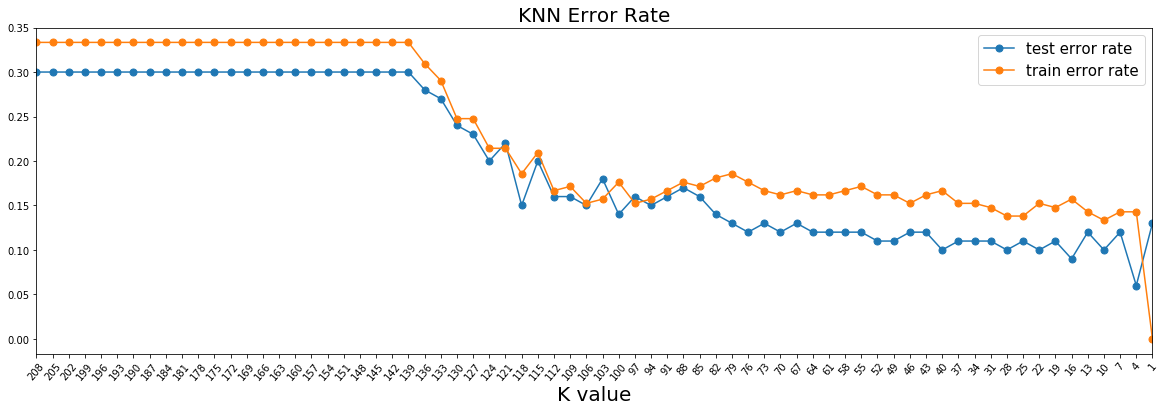

In [84]:
#(c)ii
error.plot(x = 'k_value', y = ['test_error_rate', 'train_error_rate'], 
           marker = 'o', 
                markersize = 7, figsize = (20,6))
ax = plt.gca()
ax.invert_xaxis()
ax.set_xticks(error['k_value'])
plt.xticks(rotation = 50)
plt.title('KNN Error Rate', fontsize = 20)
ax.legend(('test error rate', 'train error rate'), fontsize = 15)
ax.set_xlabel('K value', fontsize = 20)
plt.savefig('knn_error_rate.png')


In [85]:
train_data_param = get_param(train_data, "class")
train_data_label = get_label(train_data, "class")
    
test_data_param = get_param(test_data, "class")
test_data_label = get_label(test_data, "class")

In [86]:
from sklearn.metrics import confusion_matrix, f1_score
optimal_k = get_optimal_k(error, 'test_error_rate')
knn_optimal_classifier = KNeighborsClassifier(n_neighbors = optimal_k, metric = 'euclidean')
knn_optimal_classifier.fit(train_data_param, train_data_label)
knn_optimal_prediction_test = knn_optimal_classifier.predict(test_data_param)

print("K value with the lowest test error rate is: ", optimal_k)

knn_optimal_confusion_matrix = confusion_matrix(knn_optimal_prediction_test, test_data_label)
print("Confusion Matrix when k = ", optimal_k, ":\n", knn_optimal_confusion_matrix)

tn, fp, fn, tp = knn_optimal_confusion_matrix.ravel()
print("True positive rate: ", tp / (tp + fn))
print("True negative rate: ", tn / (tn + fp))
print("Precision: \t", tp / (tp + fp))
print("F1 Score : \t", f1_score(get_label(test_data, 'class'), knn_optimal_prediction_test))

K value with the lowest test error rate is:  4
Confusion Matrix when k =  4 :
 [[25  1]
 [ 5 69]]
True positive rate:  0.9324324324324325
True negative rate:  0.9615384615384616
Precision: 	 0.9857142857142858
F1 Score : 	 0.9583333333333333


In [87]:
learning_curve = pd.DataFrame(columns = ['training_set_size' ,'optimal_k', 'best_test_error_rate'])
for i in range(10, (len(train_data) + 1), 10):
    
    num_train_data_class0 = np.floor(i/3)
    num_train_data_class1 = i - num_train_data_class0
   
    num_train_data_class0 = int(num_train_data_class0)
    num_train_data_class1 = int(num_train_data_class1)
    
    train_data_sub = make_train_data(train_data, num_train_data_class0, num_train_data_class1)
    
    learning_error = get_knn_error(train_data_sub, test_data, len(train_data_sub), 5, 'euclidean')
    optimal_k = get_optimal_k(learning_error, 'test_error_rate')
    best_test_error_rate = learning_error['test_error_rate'][(learning_error['k_value'] == optimal_k).values.argmax()]
    learning_curve = learning_curve.append({'training_set_size' : i,
                                           'optimal_k' : optimal_k,
                                            'best_test_error_rate': best_test_error_rate}, 
                                           ignore_index = True)

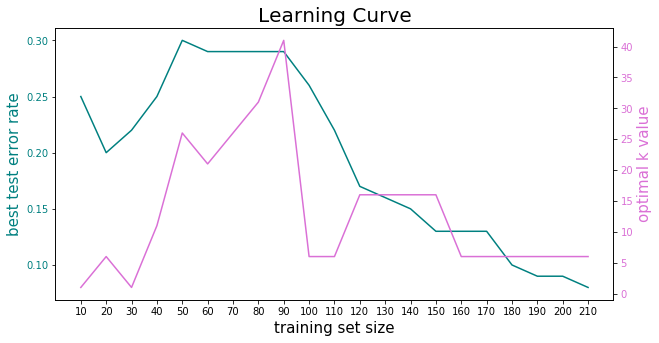

In [88]:
fig, ax1 = plt.subplots(1,1, figsize = (10,5))
ax1.plot(learning_curve['training_set_size'], learning_curve['best_test_error_rate'], color = 'teal')
ax1.set_xlabel('training set size', fontsize = 15)
ax1.set_ylabel('best test error rate', fontsize = 15, color = 'teal')
ax1.set_xticks(learning_curve['training_set_size'])
ax1.tick_params(axis = 'y', labelcolor = 'teal')

ax2 = ax1.twinx()
ax2.plot(learning_curve['training_set_size'], learning_curve['optimal_k'], color = 'orchid')
ax2.set_ylabel('optimal k value', fontsize = 15, color = 'orchid')
ax2.tick_params(axis = 'y', labelcolor = 'orchid')
ax2.set_title("Learning Curve", fontsize = 20)
plt.xticks(rotation = 50)
plt.savefig("learning_curve.png")

In [89]:
manhattan_error = get_knn_error(train_data, test_data, 200, 5, 'minkowski', p = 1)
manhattan_optimal_k = get_optimal_k(manhattan_error, 'test_error_rate')
manhattan_best_test_error = get_best_error(manhattan_error, 'test_error_rate')
manhattan_optimal_k

1

In [90]:
#finding the best logp value
logp_list = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]

best_logp = None
minkowski_min_error = float('inf')

for logp in logp_list:
    p = 10**logp
    minkowski_knn_classifier = KNeighborsClassifier(n_neighbors = manhattan_optimal_k, metric = 'minkowski', p = p)
    minkowski_knn_classifier.fit(train_data_param, train_data_label)
    minkowski_knn_test = minkowski_knn_classifier.predict(test_data_param)
    minkowski_knn_error = (1 - accuracy_score(minkowski_knn_test, test_data_label))
    if(minkowski_knn_error < minkowski_min_error) :
        minkowski_min_error = minkowski_knn_error
        best_logp = logp
best_logp

0.7

In [91]:
minkowski_error = get_knn_error(train_data, test_data, 200, 5, metric = 'minkowski', p = 10**best_logp)
minkowski_optimal_k = get_optimal_k(minkowski_error, 'test_error_rate')
minkowski_best_test_error = get_best_error(minkowski_error, 'test_error_rate')

In [92]:
pseudo_inverse = np.linalg.pinv(train_data_param)
mahalanobis_error = get_knn_error(train_data, test_data, 200, 5, metric = 'mahalanobis', metric_param = {'V' : np.cov(pseudo_inverse)})
mahalanobis_optimal_k = get_optimal_k(mahalanobis_error, 'test_error_rate')
mahalanobis_best_test_error = get_best_error(mahalanobis_error, 'test_error_rate')

In [93]:
distance_metrics = ['manhattan', 'minkowski', 'mahalanobis']
optimal_k_list = [manhattan_optimal_k, minkowski_optimal_k, mahalanobis_optimal_k]
best_test_error_list = [manhattan_best_test_error, minkowski_best_test_error, mahalanobis_best_test_error]
different_errors = pd.DataFrame({'distance_metric' : distance_metrics,
                                           'optimal_k_value' : optimal_k_list, 
                                           'best_test_error_rate': best_test_error_list})
different_errors

,distance_metric,optimal_k_value,best_test_error_rate
0,manhattan,1,0.11
1,minkowski,6,0.07
2,mahalanobis,6,0.09


In [94]:
weighted_decision_error = pd.DataFrame(columns = ['distance_metric', 'optimal_k_value', 'best_test_error_rate'])
weighted_distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

In [95]:
for distance_metric in weighted_distance_metrics:
    
    weighted_error = get_knn_error(train_data, test_data, 200, 5, metric = distance_metric, weights = 'distance' )
    weighted_bestk = get_optimal_k(weighted_error, 'test_error_rate')
    weighted_best_test_error = get_best_error(weighted_error, 'test_error_rate')
    weighted_decision_error = weighted_decision_error.append({'distance_metric': distance_metric,
                                                         'optimal_k_value': weighted_bestk,
                                                         'best_test_error_rate': weighted_best_test_error},
                                                        ignore_index = True)
weighted_decision_error

,distance_metric,optimal_k_value,best_test_error_rate
0,euclidean,6,0.08
1,manhattan,1,0.11
2,chebyshev,16,0.08


# Answers and explanations

### (b) Pre-processing and explanatory data analysis:
##### (i) scatterplot
<img src = "scatterplot.png">
    
    Above is the scatterplot of independent variables of the dataset. The pink markers represent class 1(Abnormal), and the green markers class 0(Normal). Both class 0 and 1 show some degree of correlation between independent variables, and show stronger correlation for (pelvic incidence and lumbar lordosis angle), (pelvic incidence and sacral slope), (lumbar lordosis angle and scrapal slope), and (degree spondylolisthesis with other independent variables). Moreover, class 0 tends to be more clustered than class 1. The diagonal part of the scatterplot shows the distribution density of each independent variable. We can see that the distribution of class 0 and 1 are very different for 'degree spondylolisthesis'. Therefore, 'degree spondylolisthesis may be one of the most controlling factors for classifying between class 0 and class 1.
    
##### (ii) boxplot
<img src = "boxplot.png">
    
    Above is the boxplot of independent variables of the dataset. The pink markers represent class 1(Abnormal) and the green markers represent class 0(Normal). We can see that each class 0 and 1 is distributed diffrently for each independent variable. Moreover, class 1 tends to have more outliers than class 0. This corresponds to the fact that the scatterplot in (b)i shows class 0 to be more clustered than class 1. Moreover, the distribution of 'degree spondylolisthesis' for class 0 is centered near 0, identical to what we saw in the scatterplot in (b)i.

##### (iii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

    set functions for generating training set and test set
    code:
```python
        def make_train_data (data, num_class0, num_class1):
            train_data_class0 = data[data["class"] == 0][0 : num_class0]
            train_data_class1 = data[data["class"] == 1][0 : num_class1]
            train_data_set = pd.concat([train_data_class0, train_data_class1])
            return train_data_set
  
        def make_test_data (data, num_class0_train_data, num_class1_train_data):
        test_data_class0 = data[data["class"] == 0][num_class0_train_data : ]
        test_data_class1 = data[data["class"] == 1][num_class1_train_data : ]
        test_data = pd.concat([test_data_class0, test_data_class1])
        return test_data
```
    generate training set and test set
    code:
```python
        num_class0_data = 70
        num_class1_data = 140

        train_data = make_train_data(dataframe, num_class0_data, num_class1_data)
        test_data = make_test_data(dataframe, num_class0_data, num_class1_data)
```
### (c) Classification using KNN on Vertebral Column Data Set:
##### (i) Write code for k-nearest neighbors with Euclidean metric
    code:
```python
        knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
```
##### (ii) Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. 
#####    Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). 
<img src = "knn_error_rate.png">
    
    The plot above shows the test and train error rate when using the KNeighbor classifier(using the Euclidean distance metric) in the python library sklearn. The k value increments from 1 to 210(length of test and train set) by 3. We can see that both the train error rate and test error rate remain steady while 139 <= k <= 208, and starts to drop whe k = 136. Although there are some fluctuations, both the train error rate and test error rate tend to decrease as the value of k decreases. The lowest train error rate is 0 when k = 1, and the lowest test error rate occurs when k = 4. The test error rate increases drastically when k = 1, which may due to overfitting.
    
##### Which k∗ is the most suitable k among those values? 

    k* = 4
    
    Each column in the tabel below represents the k value, the training error rate, test error rate, (training error rate / second smallest training error rate), (test error rate / smallest test error rate). 
    (Table consists of only k <= 76 because the error rates decrease drastically when k = 76)
    
      k_value  train_error_rate  test_error_rate  difference_train  difference_test
       1.0          0.000000             0.13          0.000000         2.166667
       4.0          0.142857             0.06          1.071429         1.000000
       7.0          0.142857             0.12          1.071429         2.000000
      10.0          0.133333             0.10          1.000000         1.666667
      13.0          0.142857             0.12          1.071429         2.000000
      16.0          0.157143             0.09          1.178571         1.500000
      19.0          0.147619             0.11          1.107143         1.833333
      22.0          0.152381             0.10          1.142857         1.666667
      25.0          0.138095             0.11          1.035714         1.833333
      28.0          0.138095             0.10          1.035714         1.666667
      31.0          0.147619             0.11          1.107143         1.833333
      34.0          0.152381             0.11          1.142857         1.833333
      37.0          0.152381             0.11          1.142857         1.833333
      40.0          0.166667             0.10          1.250000         1.666667
      43.0          0.161905             0.12          1.214286         2.000000
      46.0          0.152381             0.12          1.142857         2.000000
      49.0          0.161905             0.11          1.214286         1.833333
      52.0          0.161905             0.11          1.214286         1.833333
      55.0          0.171429             0.12          1.285714         2.000000
      58.0          0.166667             0.12          1.250000         2.000000
      61.0          0.161905             0.12          1.214286         2.000000
      64.0          0.161905             0.12          1.214286         2.000000
      67.0          0.166667             0.13          1.250000         2.166667
      70.0          0.161905             0.12          1.214286         2.000000
      73.0          0.166667             0.13          1.250000         2.166667
      76.0          0.176190             0.12          1.321429         2.000000
    
    The training error rate is lowest(0) when k = 1, and the test error rate is lowest(0.06) when k = 4. 
    Let's first assume k* = 1, since it gives the lowest training error rate.
    Although the training error rate is 0, when k = 1, the test error is 2.166667 times bigger than the smallest test error rate. It is a huge increase compared to test error rates corresponding to adjacent k values. This may be caused by overfitting. Since our objective is to predict input data correctly, k* should not be set to 1. (Therefore, the train error rate difference for each k is computed as (test_error_rate[i]/ second smallest training error rate(0.10, when k = 10)). 
    
    Now let's assume k* = 4, since it gives the lowest test error rate.
    When k = 4, the test error rate is the lowest(0.06), and the training error rate is only 1.071429 times bigger than the second smallest training error rate(0.10). Although there are other k values that have lower training error rates, the corresponding test error rates are almost 2 times bigger than the smallest test error rate. As mentioned above, our prime objective is to correctly classify incoming data. Therefore, it is more logical to set k* to a value based on the test error. 
    
    Therefore, when k ∈ {208, 205, . . . , 7, 4, 1, }, the optimal k* is 4.

##### Calculate the confusion matrix, true positive rate, true negative rate, precision, and F -score when k = k∗.1

    confusion matrix:

                   actual class
                    | 0 | 1 |
                 ---|---|---|
          predict 0 | 25|  1|
                  1 |  5| 69|

    True positive rate:  0.9324324324324325
    True negative rate:  0.9615384615384616
    Precision: 	 0.9857142857142858
    F1 Score : 	 0.9583333333333333

     The confusion matrix above shows that TN = 25, FN =5, TP = 69, FP = 1.
     True positive rate = TP / (TP + FN) = 69 / (69 + 5) = 0.9324324324324325
     True negative rate = TN / (TN + FP) = 25 / (25 + 1) = 0.9615384615384616
     Precision = TP / (TP + FP) = 69 / (69 + 1) = 0.9857142857142858
     F1 score = 2 * (precision * recall) / (precison + recall)
              = 2 * (0.9857142857142858 * 0.9324324324324325) / (0.9857142857142858 + 0.9324324324324325)
              = 0.9583333333333333

##### (iii) Plot the best test error rate (Learning curve)
<img src = "learning_curve.png">

    The green line in the plot above shows the laerning curve of the test data set according to the size of training data set, and the purple line shows it's corresponding optimal k. We can observe that the best test error rate decreases when the size of training data set increases from 10 to 20, but increases again when the size of training set increases from 20 to 50. When the size of training set >= 50, the best test error rate tends to decrease as the size of training data set increases. Although the lowest best test error rate occurs when the number of training set is 210, the best test error rate goes below 0.15 when the size of training set >= 140, and goes below 0.10 when the size of training set >= 180. Since error rate 0.15 is fairly low, if there are computational restrictions to setting the size of training set to 210, one can set the size larger or equal to 140, according to their desired test error rate.
    
 
### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. 
##### (i) Minkowski Distance:
   ###### A.which becomes Manhattan Distance with p = 1

    Retrieve the best k value when using the Manhattan distance metric(minkowski metric when p = 1)
    code:
``` python
        manhattan_error = get_knn_error(train_data, test_data, 200, 5, 'minkowski', p = 1)
        manhattan_optimal_k = get_optimal_k(manhattan_error, 'test_error_rate')
```
    The optimal k value when using the Manhattan distance metric = 6
    
   ###### B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?
    
    Using the best k value retrieved from (d)i.A, find the best log10(p) value
    code:
``` python
        logp_list = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]

        best_logp = None
        minkowski_min_error = float('inf')

        for logp in logp_list:
            p = 10**logp
            minkowski_knn_classifier = KNeighborsClassifier(n_neighbors = manhattan_optimal_k, 
                                                        metric = 'minkowski', p = p)
            minkowski_knn_classifier.fit(train_data_param, train_data_label)
            minkowski_knn_test = minkowski_knn_classifier.predict(test_data_param)
            minkowski_knn_error = (1 - accuracy_score(minkowski_knn_test, test_data_label))
            if(minkowski_knn_error < minkowski_min_error) :
                minkowski_min_error = minkowski_knn_error
                best_logp = logp
```
    The best log10(p) is 0.7
    Use the the value of p retrived from (d)i.B to find the optimal k and its best test error rate when using the minkowski distance.
    code:
``` python
        minkowski_error = get_knn_error(train_data, test_data, 200, 5, 
                                        'minkowski', None, p = 10**best_logp)
        minkowski_optimal_k = get_optimal_k(minkowski_error, 'test_error_rate')
        minkowski_best_test_error = get_best_error(minkowski_error, 'test_error_rate')
```
##### (ii) Mahalanobis Distance:
    code:
``` python
        pseudo_inverse = np.linalg.pinv(train_data_param)
        mahalanobis_error = get_knn_error(train_data, test_data, 200, 5, 
                                          'mahalanobis', {'V' : np.cov(pseudo_inverse)})
        mahalanobis_optimal_k = get_optimal_k(mahalanobis_error, 'test_error_rate')
        mahalanobis_best_test_error = get_best_error(mahalanobis_error, 'test_error_rate')
```    
	The optimal k and best test error rate found by KNeighbor classifer using metrics Minkowski and Mahalanobis is as below	
            distance_metric	optimal_k_value	best_test_error_rate
                minkowski	          6	             0.07
                mahalanobis	        6	             0.09

    The optimal k value is 6 for both distance metrics, but the best test error rates are slightly different.

### (e) Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.
    
    Change the 'weights' parameter to 'distance' for weighted voting, and plugging in the given distance metrics.
    code:
``` python
        for distance_metric in weighted_distance_metrics:
            weighted_error = get_knn_error(train_data, test_data, 200, 5, 
                                           metric = distance_metric, weights = 'distance')
            weighted_bestk = get_optimal_k(weighted_error, 'test_error_rate')
            weighted_best_test_error = get_best_error(weighted_error, 'test_error_rate')
            weighted_decision_error = weighted_decision_error.append({'distance_metric': distance_metric,
                                                         'optimal_k_value': weighted_bestk,
                                                         'best_test_error_rate': weighted_best_test_error},
                                                        ignore_index = True)
``` 
    The best test error rate and its corresponiding optimal k value for each distance metric is as below:
            distance_metric 	optimal_k_value	 best_test_error_rate
               euclidean	           6	               0.08
               manhattan	           1	               0.11
               chebyshev	          16	               0.08

### (f) What is the lowest training error rate you achieved in this homework?
    The lowest training error rate is 0 for every metric when k = 1